In [7]:
# Import necessary libraries
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import praw
from transformers import pipeline

C:\Users\andry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Initialize PRAW (Python Reddit API Wrapper)
user_agent = "StockMarket Sentiment Analysis"
reddit = praw.Reddit(
    client_id="SDD6BO5WvswKQ2DOZrioiQ",
    client_secret="BoGTdq9xg1Wu4kjy3zj_WBLbTInQvQ",
    user_agent=user_agent
)

# Initialize the subreddit
subreddit = reddit.subreddit("wallstreetbets")

In [9]:
# List to hold data for each post
posts = []

# Fetch posts from the subreddit
for submission in subreddit.new(limit=1000):
    post_date = datetime.datetime.fromtimestamp(submission.created_utc)
    posts.append({
        'id': submission.id,
        'title': submission.title,
        'selftext': submission.selftext,
        'score': submission.score,
        'num_comments': submission.num_comments,
        'upvote_ratio': submission.upvote_ratio,       
        'created_date': post_date,
        'url': submission.url
    })

# Convert the list to a DataFrame
raw_df = pd.DataFrame(posts)
raw_df

,id,title,selftext,score,num_comments,upvote_ratio,created_date,url
0,1ko4dkk,$RDTL. If you didn’t listen to me the first ti...,,1,0,1.00,2025-05-16 17:55:33,https://i.redd.it/sxoztqru161f1.jpeg
1,1ko44ab,So SUNE has lost a lot of people's money here...,They obviously bombarded these subreddit to te...,3,3,0.80,2025-05-16 17:44:53,https://www.reddit.com/r/wallstreetbets/commen...
2,1ko40t6,What's the safest put for $10 rn ?,"I'm new to trading, lost $7 which is fine, but...",6,21,0.69,2025-05-16 17:41:02,https://www.reddit.com/r/wallstreetbets/commen...
3,1ko3zfx,Exclusive: Musk took leased cars back so Tesla...,Tesla last November ended an unusual policy th...,29,6,0.94,2025-05-16 17:39:36,https://www.reuters.com/sustainability/boards-...
4,1ko3xhv,$17K YOLO on UNH,,3,4,0.80,2025-05-16 17:37:27,https://i.redd.it/9194kwhmy51f1.jpeg
...,...,...,...,...,...,...,...,...
858,1k7r069,$NVDA call printing! 🤑,,166,41,0.94,2025-04-25 19:41:21,https://i.redd.it/9zoh654lp0xe1.jpeg
859,1k7qtvb,Tesla Puts Will Print Next Week,This is not cope I swear,8083,540,0.97,2025-04-25 19:33:56,https://i.redd.it/kz93lwi9o0xe1.jpeg
860,1k7qsl3,Well I was on the wrong side of this one. Gla...,No sense holding through the weekend with thet...,96,30,0.95,2025-04-25 19:32:31,https://i.redd.it/te3uxye0o0xe1.jpeg
861,1k7q60e,Isn’t the first one always free?,I mean at this point why not just use my NVDIA...,347,38,0.96,2025-04-25 19:07:08,https://i.redd.it/z5vnw1bhj0xe1.jpeg


In [10]:
# URL with the S&P 500 companies list on Wikipedia
stocks_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read the HTML table from the page
tables = pd.read_html(stocks_url)
sp500_df = tables[0]

# Extract the ticker symbols (the column is usually named "Symbol")
tickers = sp500_df['Symbol'].tolist()

# Clean the ticker symbols to ensure they are in the correct format
tickers_dollar = [f"${ticker.upper()}" for ticker in tickers]
tickers_dollar

['$MMM',
 '$AOS',
 '$ABT',
 '$ABBV',
 '$ACN',
 '$ADBE',
 '$AMD',
 '$AES',
 '$AFL',
 '$A',
 '$APD',
 '$ABNB',
 '$AKAM',
 '$ALB',
 '$ARE',
 '$ALGN',
 '$ALLE',
 '$LNT',
 '$ALL',
 '$GOOGL',
 '$GOOG',
 '$MO',
 '$AMZN',
 '$AMCR',
 '$AEE',
 '$AEP',
 '$AXP',
 '$AIG',
 '$AMT',
 '$AWK',
 '$AMP',
 '$AME',
 '$AMGN',
 '$APH',
 '$ADI',
 '$ANSS',
 '$AON',
 '$APA',
 '$APO',
 '$AAPL',
 '$AMAT',
 '$APTV',
 '$ACGL',
 '$ADM',
 '$ANET',
 '$AJG',
 '$AIZ',
 '$T',
 '$ATO',
 '$ADSK',
 '$ADP',
 '$AZO',
 '$AVB',
 '$AVY',
 '$AXON',
 '$BKR',
 '$BALL',
 '$BAC',
 '$BAX',
 '$BDX',
 '$BRK.B',
 '$BBY',
 '$TECH',
 '$BIIB',
 '$BLK',
 '$BX',
 '$BK',
 '$BA',
 '$BKNG',
 '$BSX',
 '$BMY',
 '$AVGO',
 '$BR',
 '$BRO',
 '$BF.B',
 '$BLDR',
 '$BG',
 '$BXP',
 '$CHRW',
 '$CDNS',
 '$CZR',
 '$CPT',
 '$CPB',
 '$COF',
 '$CAH',
 '$KMX',
 '$CCL',
 '$CARR',
 '$CAT',
 '$CBOE',
 '$CBRE',
 '$CDW',
 '$COR',
 '$CNC',
 '$CNP',
 '$CF',
 '$CRL',
 '$SCHW',
 '$CHTR',
 '$CVX',
 '$CMG',
 '$CB',
 '$CHD',
 '$CI',
 '$CINF',
 '$CTAS',
 '$CSCO',
 '$C',
 '$C

In [11]:
long_blacklist = {'I', 'ARE',  'ON', 'GO', 'NOW', 'CAN', 'UK', 'SO', 'OR', 'OUT', 'SEE', 'ONE', 'LOVE', 'U', 'STAY', 'HAS', 'BY', 'BIG', 'GOOD', 'RIDE', 'EOD', 'ELON', 'WSB',
            'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO','DD', 'BTFD',
            'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 
            'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO','LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT',
            'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 
            'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG'}

blacklist = {'A', 'ARE', 'ALL', 'DD', 'IT', 'HAS', 'ON', 'PM', 'NOW', 'SO'}

In [12]:
# Create a regex pattern from the S&P 500 tickers list, using word boundaries to avoid false matches
pattern = r'\b(?:' + '|'.join(map(re.escape, tickers)) + r')\b'

# Combine title and selftext into one column to search both
raw_df['combined_text'] = raw_df['title'].fillna('') + " " + raw_df['selftext'].fillna('')

# Filter the DataFrame to include only posts that mention any S&P 500 stock ticker
filtered_reddit = raw_df[raw_df['combined_text'].str.contains(pattern, flags=re.IGNORECASE, regex=True)].copy()
filtered_reddit


,id,title,selftext,score,num_comments,upvote_ratio,created_date,url,combined_text
0,1ko4dkk,$RDTL. If you didn’t listen to me the first ti...,,1,0,1.00,2025-05-16 17:55:33,https://i.redd.it/sxoztqru161f1.jpeg,$RDTL. If you didn’t listen to me the first ti...
1,1ko44ab,So SUNE has lost a lot of people's money here...,They obviously bombarded these subreddit to te...,3,3,0.80,2025-05-16 17:44:53,https://www.reddit.com/r/wallstreetbets/commen...,So SUNE has lost a lot of people's money here....
3,1ko3zfx,Exclusive: Musk took leased cars back so Tesla...,Tesla last November ended an unusual policy th...,29,6,0.94,2025-05-16 17:39:36,https://www.reuters.com/sustainability/boards-...,Exclusive: Musk took leased cars back so Tesla...
4,1ko3xhv,$17K YOLO on UNH,,3,4,0.80,2025-05-16 17:37:27,https://i.redd.it/9194kwhmy51f1.jpeg,$17K YOLO on UNH
5,1ko3igh,IBKR to forward split 4:1 on 6/25,Stock is going straight up pre-split.\n\n \ne...,4,1,0.83,2025-05-16 17:20:20,https://www.reddit.com/r/wallstreetbets/commen...,IBKR to forward split 4:1 on 6/25 Stock is goi...
...,...,...,...,...,...,...,...,...,...
857,1k7r9id,GOOGle +23k Gain,https://preview.redd.it/tnfuwuzrp0xe1.png?widt...,26,5,0.84,2025-04-25 19:52:04,https://www.reddit.com/r/wallstreetbets/commen...,GOOGle +23k Gain https://preview.redd.it/tnfuw...
858,1k7r069,$NVDA call printing! 🤑,,166,41,0.94,2025-04-25 19:41:21,https://i.redd.it/9zoh654lp0xe1.jpeg,$NVDA call printing! 🤑
860,1k7qsl3,Well I was on the wrong side of this one. Gla...,No sense holding through the weekend with thet...,96,30,0.95,2025-04-25 19:32:31,https://i.redd.it/te3uxye0o0xe1.jpeg,Well I was on the wrong side of this one. Gla...
861,1k7q60e,Isn’t the first one always free?,I mean at this point why not just use my NVDIA...,347,38,0.96,2025-04-25 19:07:08,https://i.redd.it/z5vnw1bhj0xe1.jpeg,Isn’t the first one always free? I mean at thi...


---

## Sentiment Analysis

In [23]:
# Create sentiment analysis pipeline
sent_pipe = pipeline(
    "sentiment-analysis",
    model="ProsusAI/finBERT",
    top_k=None,            # get full softmax
    truncation=True
)

def finbert_score(text):
    outs = sent_pipe(text)[0] 
    print(outs)        # returns list of dicts
    score = (outs[2]["score"] - outs[1]["score"])  
    print(score)      # positive (outs[2]) - negative (outs[0])
    # neutral (outs[1]) implicitly pulls score toward 0
    return score

filtered_reddit["sentiment"] = filtered_reddit["combined_text"].apply(finbert_score)


Device set to use cuda:0


[{'label': 'neutral', 'score': 0.9039439558982849}, {'label': 'negative', 'score': 0.06164325401186943}, {'label': 'positive', 'score': 0.03441280499100685}]
-0.02723044902086258
[{'label': 'neutral', 'score': 0.7390726804733276}, {'label': 'negative', 'score': 0.22731727361679077}, {'label': 'positive', 'score': 0.03361000120639801}]
-0.19370727241039276
[{'label': 'neutral', 'score': 0.802085816860199}, {'label': 'negative', 'score': 0.14811597764492035}, {'label': 'positive', 'score': 0.04979817196726799}]
-0.09831780567765236
[{'label': 'neutral', 'score': 0.8837575316429138}, {'label': 'positive', 'score': 0.0945027768611908}, {'label': 'negative', 'score': 0.021739715710282326}]
-0.07276306115090847
[{'label': 'neutral', 'score': 0.7866774797439575}, {'label': 'negative', 'score': 0.19028598070144653}, {'label': 'positive', 'score': 0.02303653582930565}]
-0.16724944487214088
[{'label': 'positive', 'score': 0.741418719291687}, {'label': 'neutral', 'score': 0.2000616192817688}, {'l

In [22]:
filtered_reddit

,id,title,selftext,score,num_comments,upvote_ratio,created_date,url,combined_text,sentiment
0,1ko4dkk,$RDTL. If you didn’t listen to me the first ti...,,1,0,1.00,2025-05-16 17:55:33,https://i.redd.it/sxoztqru161f1.jpeg,$RDTL. If you didn’t listen to me the first ti...,-0.027230
1,1ko44ab,So SUNE has lost a lot of people's money here...,They obviously bombarded these subreddit to te...,3,3,0.80,2025-05-16 17:44:53,https://www.reddit.com/r/wallstreetbets/commen...,So SUNE has lost a lot of people's money here....,-0.193707
3,1ko3zfx,Exclusive: Musk took leased cars back so Tesla...,Tesla last November ended an unusual policy th...,29,6,0.94,2025-05-16 17:39:36,https://www.reuters.com/sustainability/boards-...,Exclusive: Musk took leased cars back so Tesla...,-0.098318
4,1ko3xhv,$17K YOLO on UNH,,3,4,0.80,2025-05-16 17:37:27,https://i.redd.it/9194kwhmy51f1.jpeg,$17K YOLO on UNH,-0.072763
5,1ko3igh,IBKR to forward split 4:1 on 6/25,Stock is going straight up pre-split.\n\n \ne...,4,1,0.83,2025-05-16 17:20:20,https://www.reddit.com/r/wallstreetbets/commen...,IBKR to forward split 4:1 on 6/25 Stock is goi...,-0.167249
...,...,...,...,...,...,...,...,...,...,...
857,1k7r9id,GOOGle +23k Gain,https://preview.redd.it/tnfuwuzrp0xe1.png?widt...,26,5,0.84,2025-04-25 19:52:04,https://www.reddit.com/r/wallstreetbets/commen...,GOOGle +23k Gain https://preview.redd.it/tnfuw...,-0.068830
858,1k7r069,$NVDA call printing! 🤑,,166,41,0.94,2025-04-25 19:41:21,https://i.redd.it/9zoh654lp0xe1.jpeg,$NVDA call printing! 🤑,-0.007593
860,1k7qsl3,Well I was on the wrong side of this one. Gla...,No sense holding through the weekend with thet...,96,30,0.95,2025-04-25 19:32:31,https://i.redd.it/te3uxye0o0xe1.jpeg,Well I was on the wrong side of this one. Gla...,-0.071865
861,1k7q60e,Isn’t the first one always free?,I mean at this point why not just use my NVDIA...,347,38,0.96,2025-04-25 19:07:08,https://i.redd.it/z5vnw1bhj0xe1.jpeg,Isn’t the first one always free? I mean at thi...,-0.082735


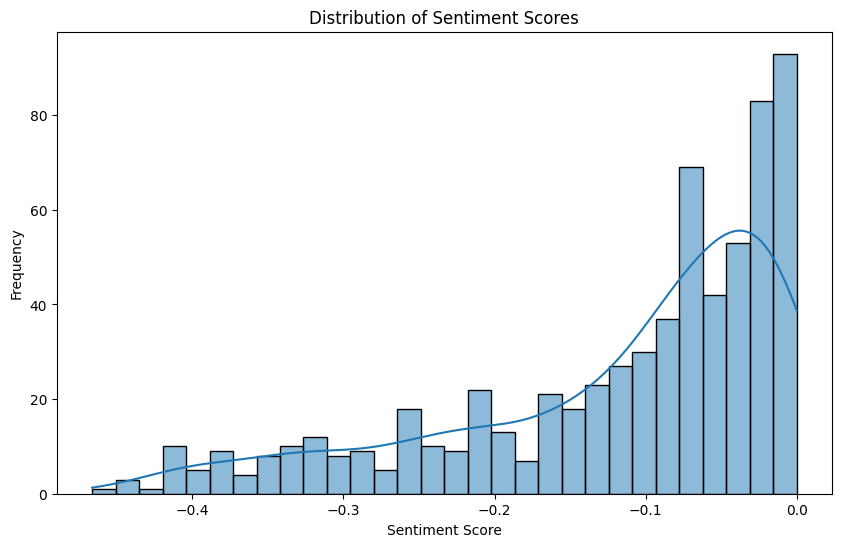

In [21]:
filtered_reddit["sentiment"].describe()
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(filtered_reddit["sentiment"], bins=30, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()